<a href="https://colab.research.google.com/github/nikhilgodalla/ObesityDataScience/blob/main/ML_Data_Cleaning_and_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Dataset**
Obesity or CVD risk Dataset

Link - https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

# **Loading and Reading Dataset**

In [2]:

null_values = ['-',np.nan]
data= pd.read_csv("https://raw.githubusercontent.com/nikhilgodalla/ObesityDataScience/main/ObesityDataSet.csv",na_values=null_values)

df = data.copy()


In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**1)What are the data types? (Only numeric and categorical)**

In [4]:
df.dtypes

,0
Gender,object
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object
SMOKE,object


In [5]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)


Numeric Columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical Columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


**2)Are there missing values?**

In [6]:
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


The dataset contains no null values, indicating that there are no missing data points across the variables.

**3)What are the likely distributions of the numeric variables?**

Histograms and Q-Q (Quantile-Quantile) plots is a powerful and insightful way to explore the likely distributions of numeric variables.

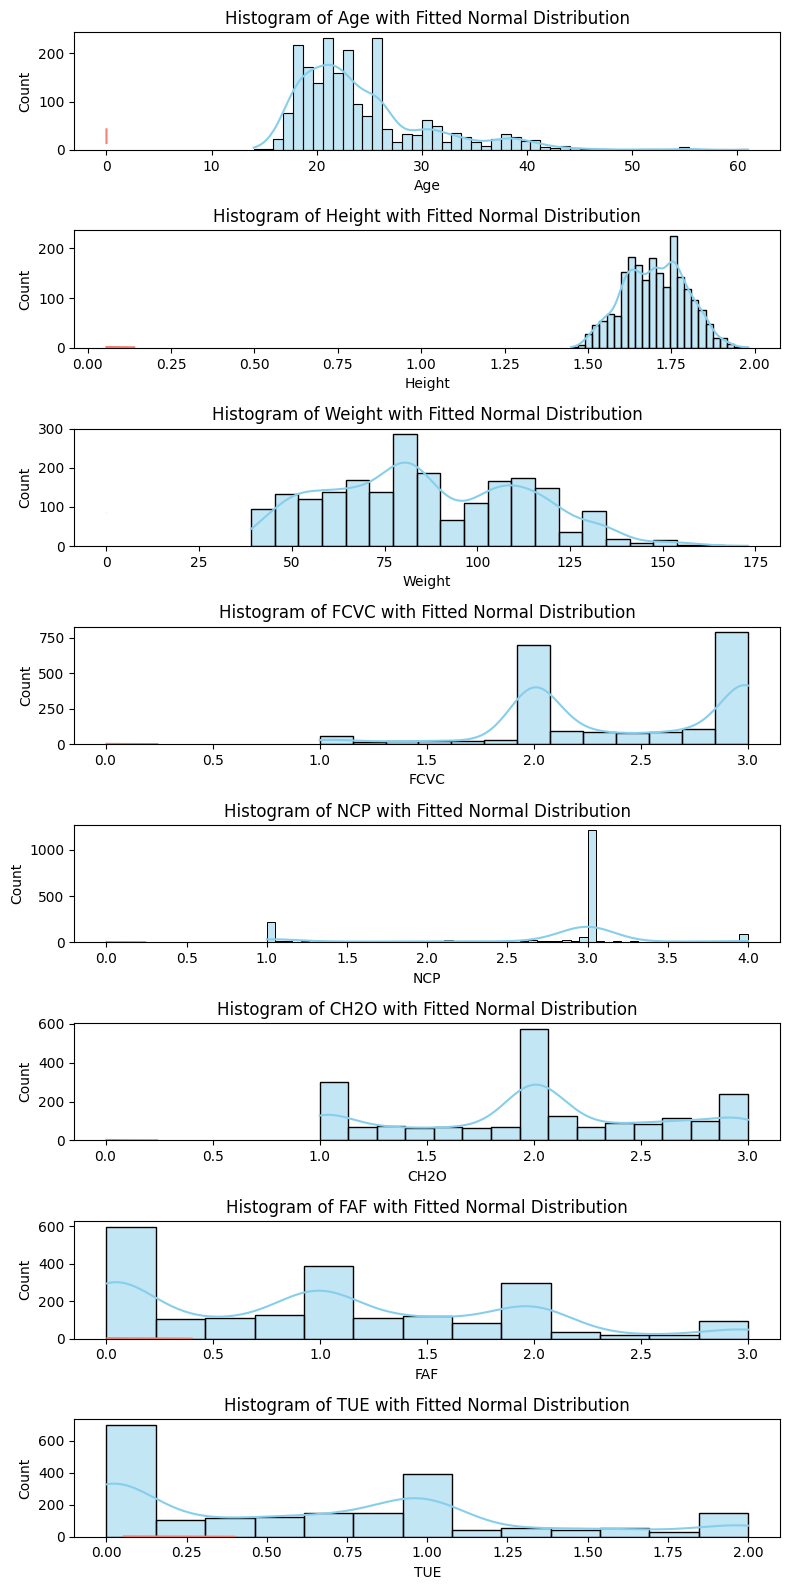

In [7]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(8, 2 * len(numeric_columns)))

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i], color='skyblue')
    sns.lineplot(x=norm.pdf(sorted(df[column])), y=sorted(df[column]), ax=axes[i], color='salmon')
    axes[i].set_title(f'Histogram of {column} with Fitted Normal Distribution')


plt.tight_layout()
plt.show()

Age: The histogram of age looks to have a bimodal distribution with two peaks, indicating that it does not closely resemble a normal distribution.

Height: This histogram is more bell-shaped, indicating that height is about normally distributed, however it seems to have a longer tail to the right (positively skewed).

Weight: The histogram appears to be right-skewed, indicating a tail on the right side. It is not an exact match for a normal distribution.

FCVC (Frequency of Vegetable Consumption): This histogram is not symmetrical, with peaks at certain intervals, indicating that it is not normally distributed.

NCP (Number of Main Meals): The distribution is heavily concentrated around a single number with limited variance, unlike a normal distribution.

CH2O (Water Consumption): The histogram indicates an abnormal distribution, with many peaks and a non-symmetrical shape.

The histogram for FAF (Physical Activity Frequency) reveals a non-normal distribution with many peaks, similar to those of FCVC and CH2O.

TUE (Time Using Technology Devices): The histogram shows an unusual distribution, with a peak on the lower end and a lengthy tail to the right.

Column Names in DataFrame: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


<Figure size 800x500 with 0 Axes>

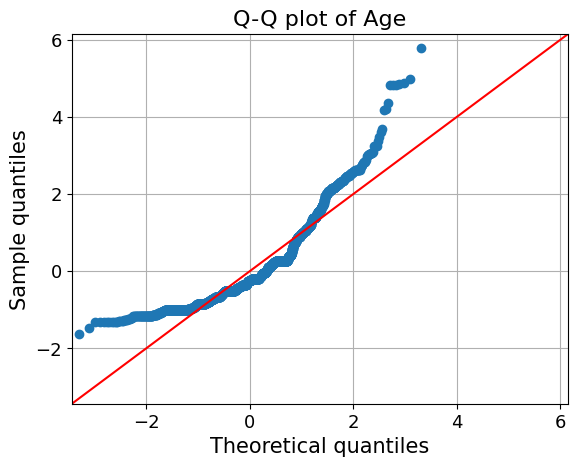

<Figure size 800x500 with 0 Axes>

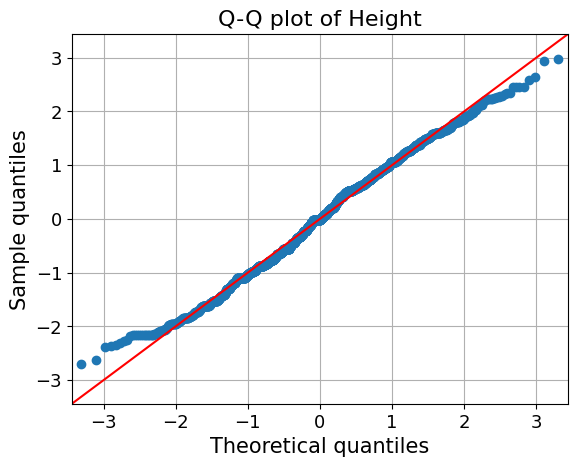

<Figure size 800x500 with 0 Axes>

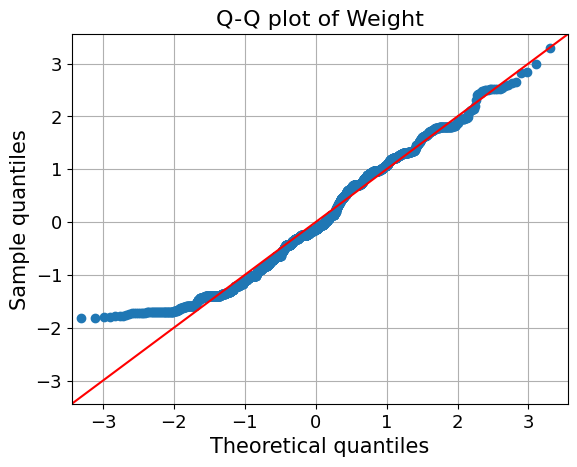

<Figure size 800x500 with 0 Axes>

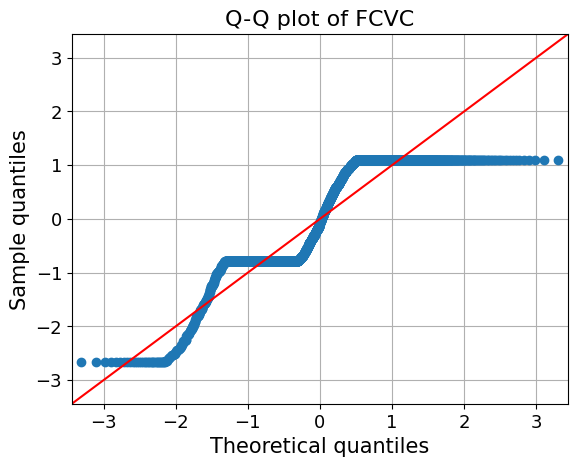

<Figure size 800x500 with 0 Axes>

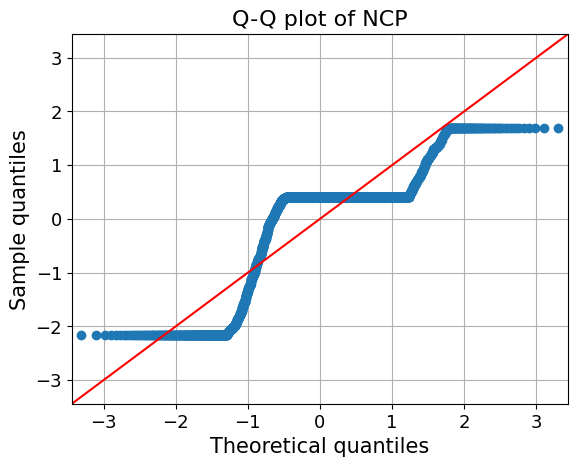

<Figure size 800x500 with 0 Axes>

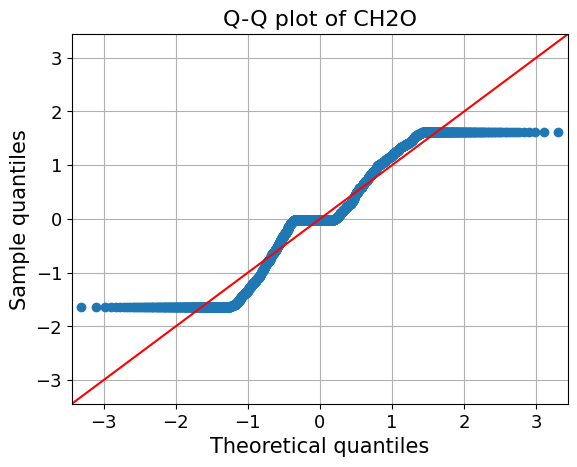

<Figure size 800x500 with 0 Axes>

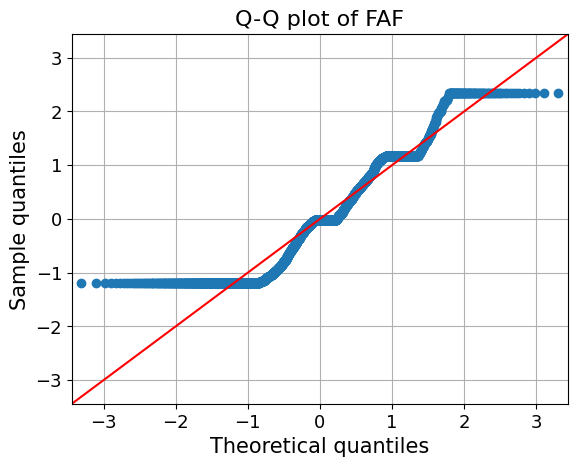

<Figure size 800x500 with 0 Axes>

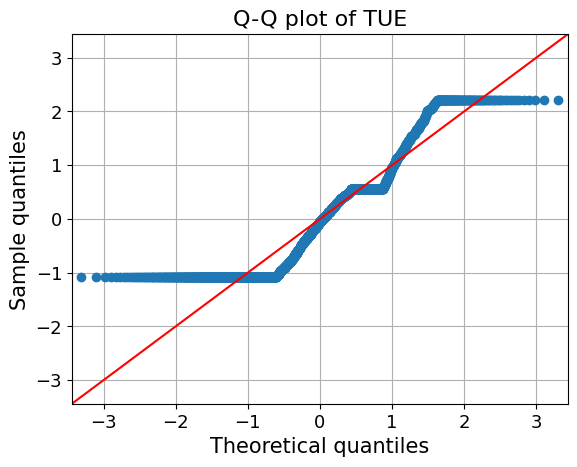

In [8]:
from statsmodels.graphics.gofplots import qqplot

# Print the column names in the DataFrame
print("Column Names in DataFrame:", df.columns)


for c in df.columns:

    if df[c].dtype in ['float64', 'int64']:

        plt.figure(figsize=(8, 5))


        fig = qqplot(df[c], line="45", fit="True")

        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.xlabel("Theoretical quantiles", fontsize=15)
        plt.ylabel("Sample quantiles", fontsize=15)
        plt.title("Q-Q plot of {}".format(c), fontsize=16)
        plt.grid(True)

        # Display the plot
        plt.show()



From the above q-q plot we can infer that the variables  are roughly following normal distribution.

**Label Encoding**

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


The code uses LabelEncoder to convert the DataFrame's category variables into numerical values. The encoded columns are: 'Gender,' 'family_history_with_overweight,' 'FAVC,' 'SMOKE,' 'SCC,' 'CALC,' and 'MTRANS'. The resulting DataFrame now has numerical values that correspond to the original category data, which is required for several machine learning approaches.

**4)Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

Univariate, Ols regression, correlation, and random forest classifier can all be used to predict a target variable.

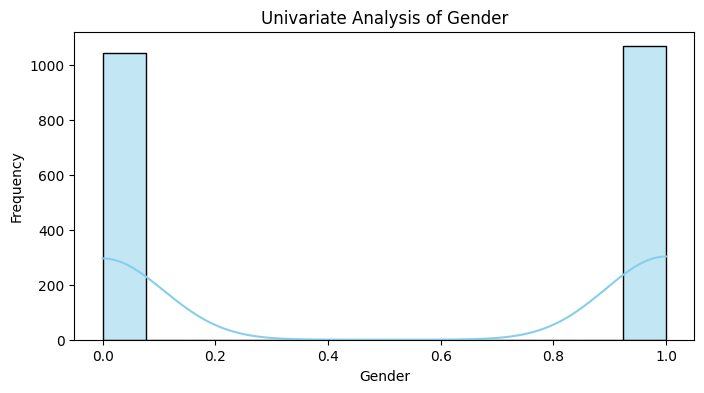

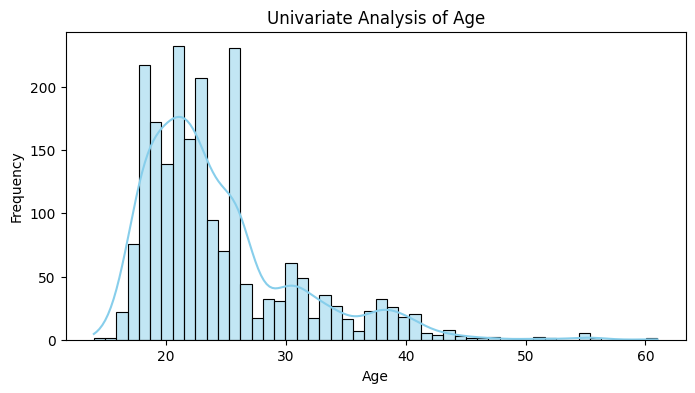

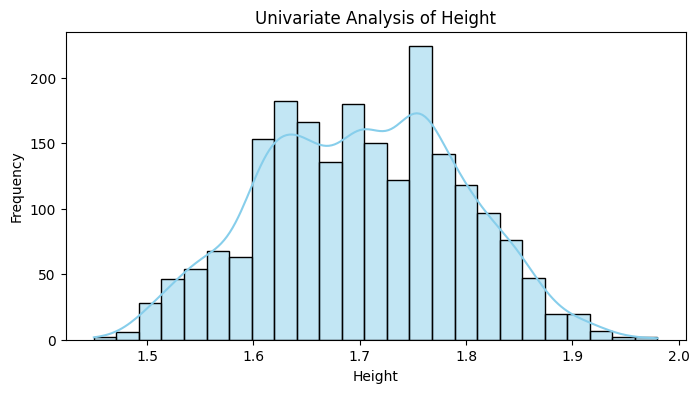

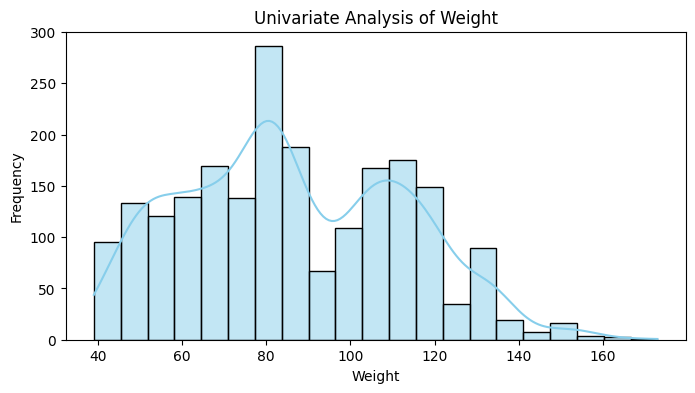

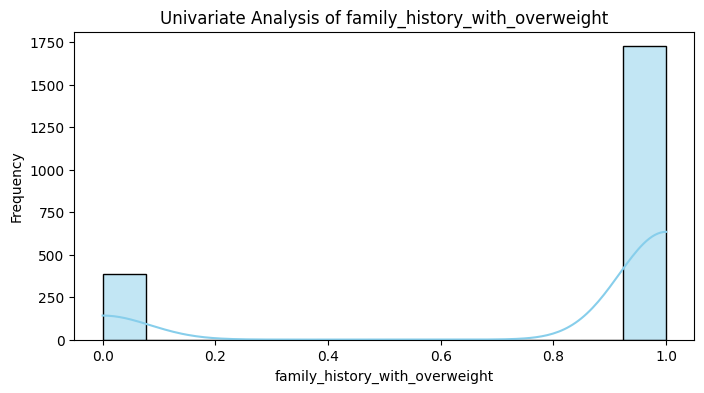

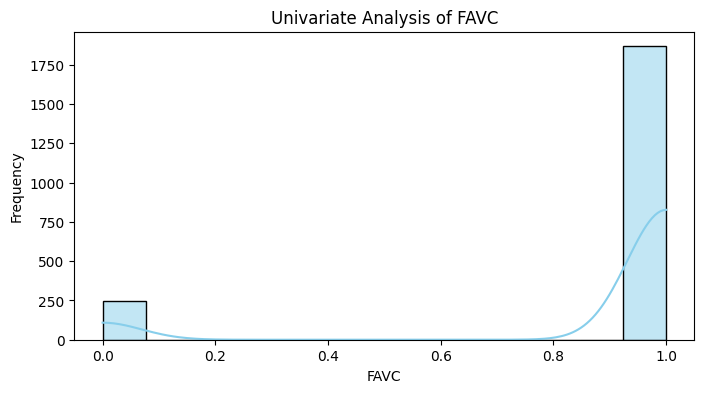

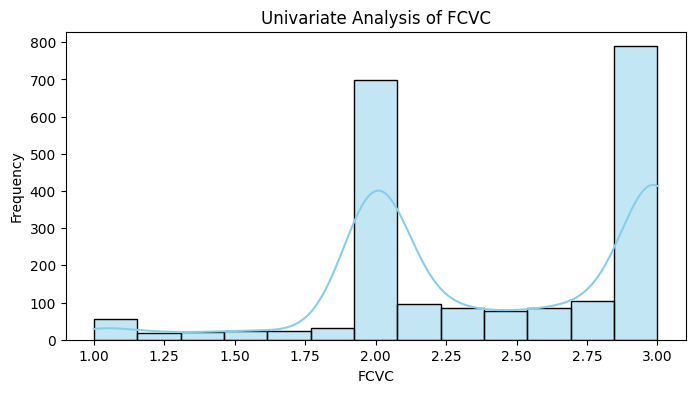

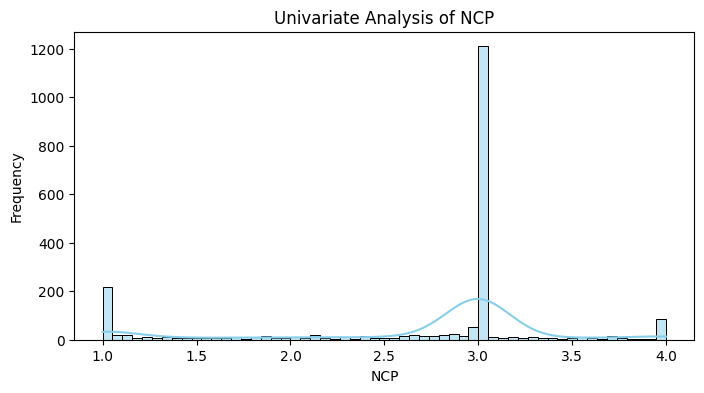

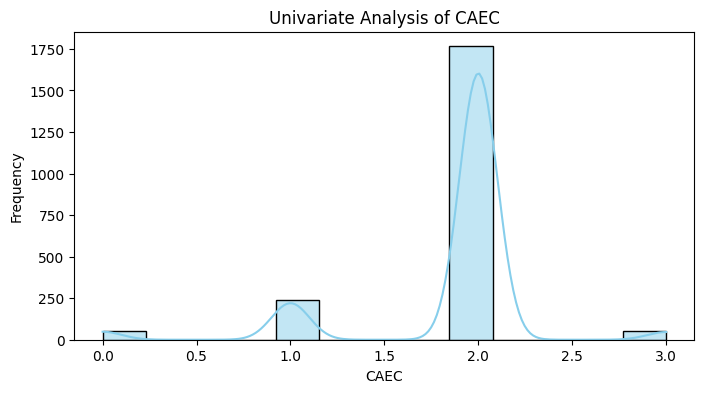

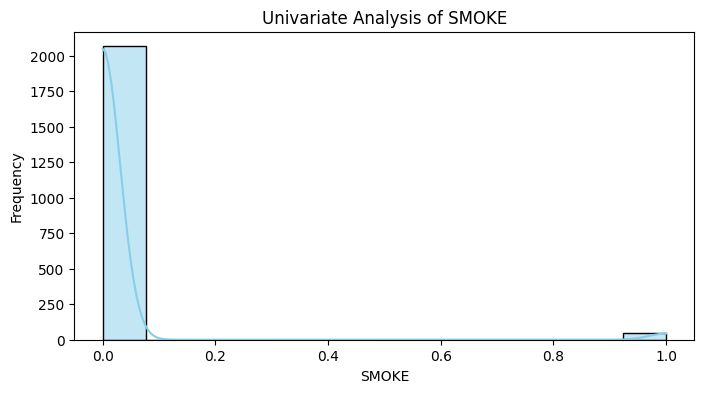

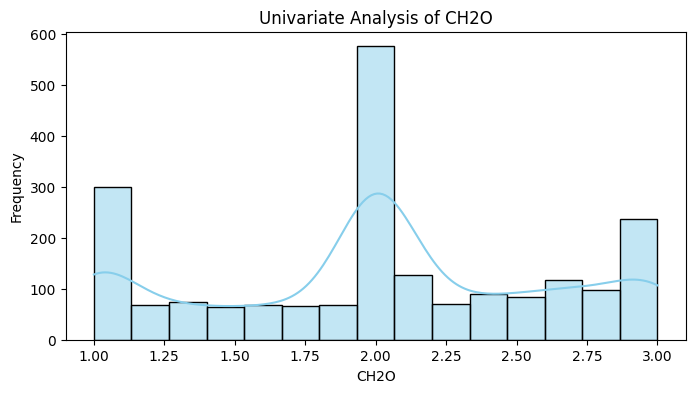

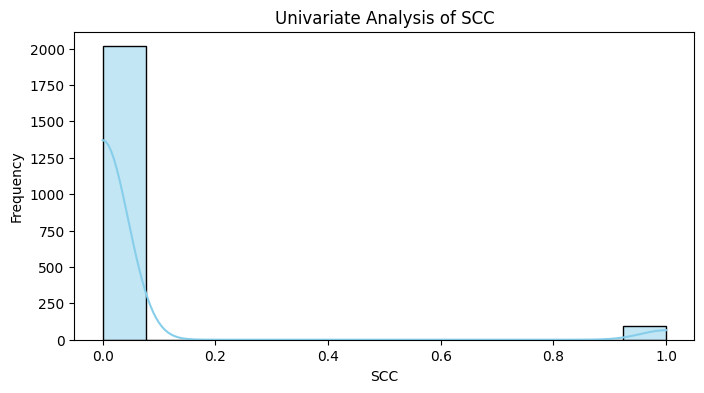

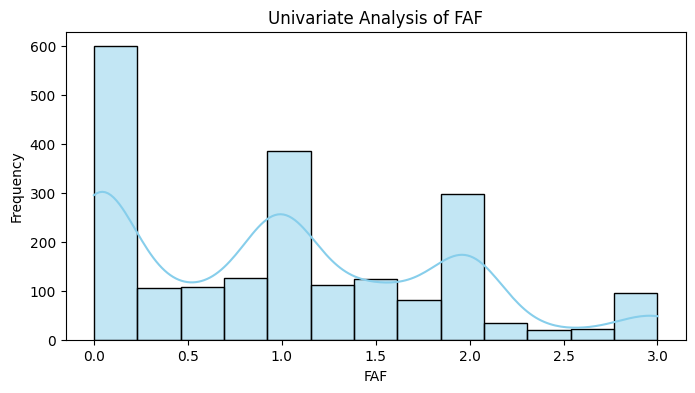

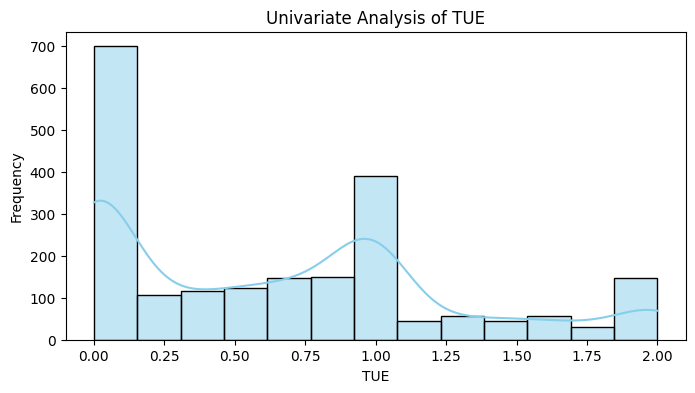

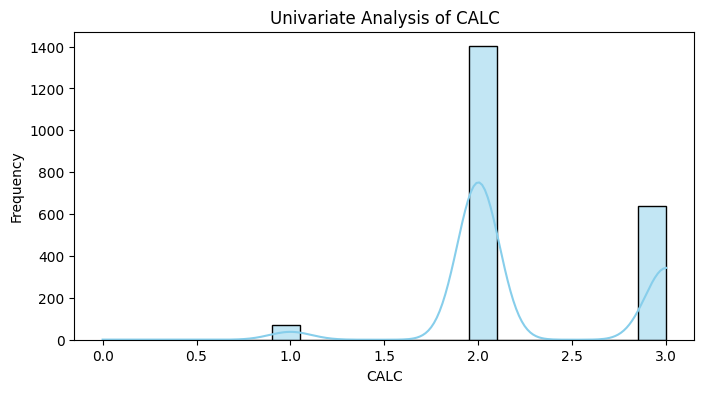

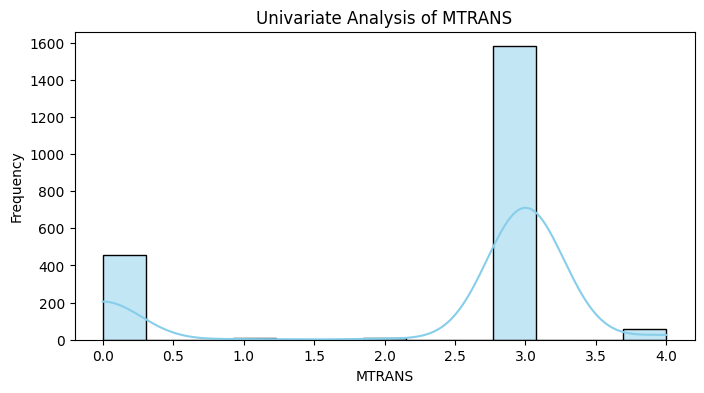

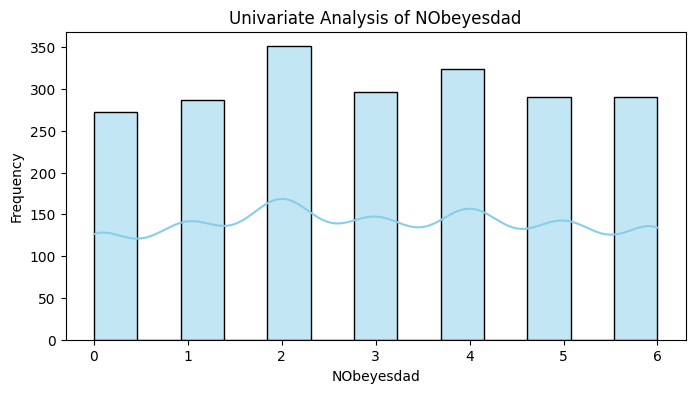

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Univariate analysis for numerical variables (histograms)
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Univariate Analysis of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Univariate analysis for categorical variables (bar plots)
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Univariate Analysis of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [11]:
import statsmodels.api as sm


X = sm.add_constant(df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']])
y = df['NObeyesdad']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             NObeyesdad   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     73.05
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          2.17e-106
Time:                        08:36:24   Log-Likelihood:                -4148.0
No. Observations:                2111   AIC:                             8314.
Df Residuals:                    2102   BIC:                             8365.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2294      0.839      6.230      0.0

Based on this data, you may conclude that the model is statistically significant, and that the significant factors (age, height, weight, FCVC, NCP, and CH2O) are related to the dependent variable (NObeyesdad).

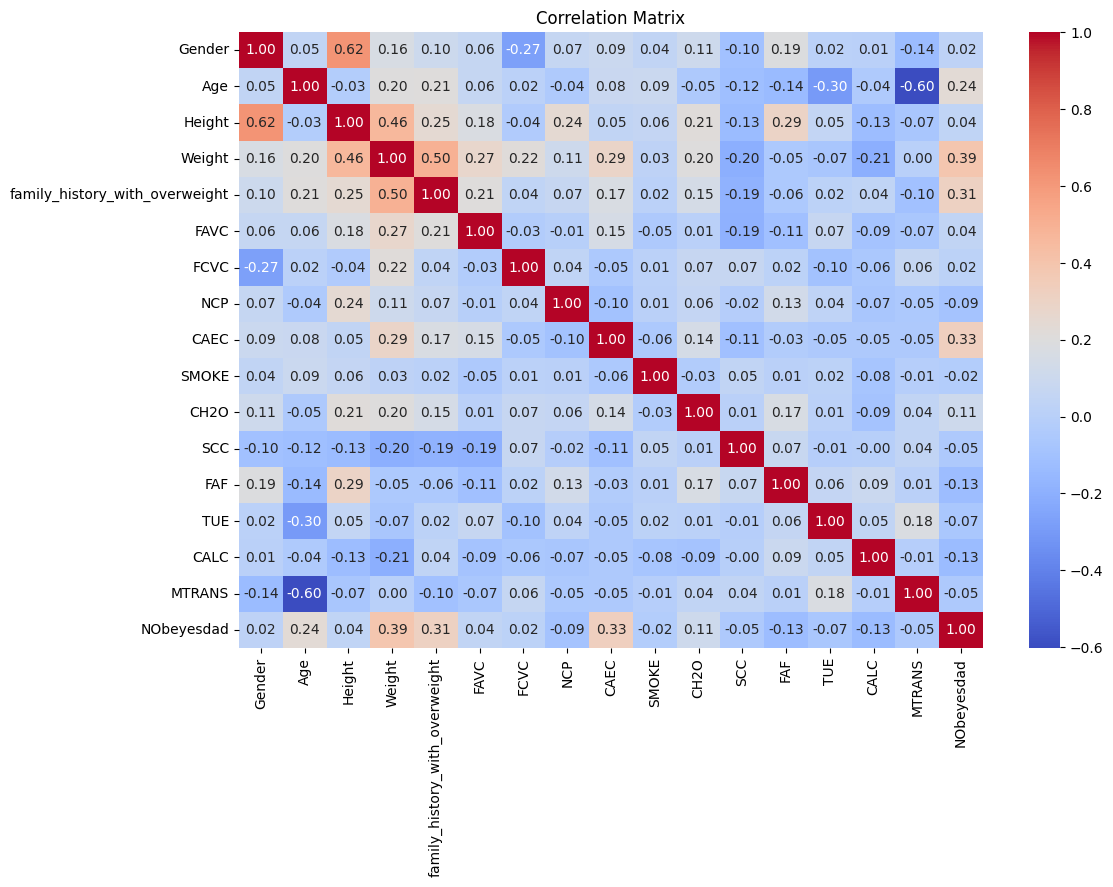

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df.corr()

# Plot a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


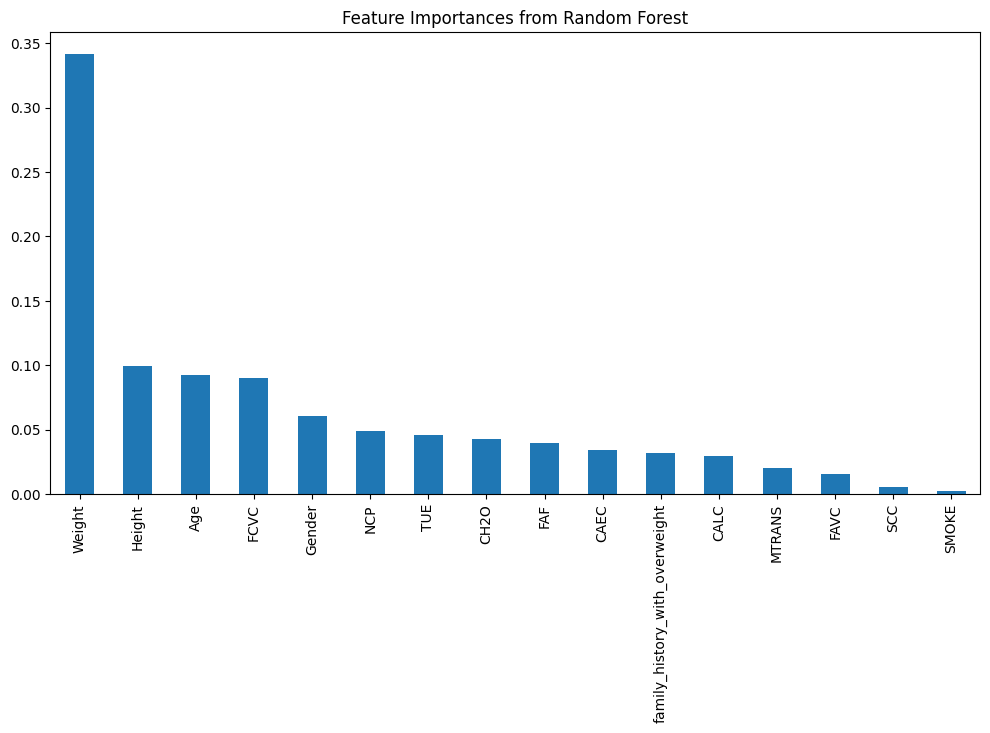

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']


model = RandomForestClassifier()
model.fit(X, y)

# Display feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
feature_importances.plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importances from Random Forest")
plt.show()


 **Summary**

Based on all the graphs generated  above the independent variables that can be used as predictors for 'NObeyesdad' are Weight, Height,Age, gender.

**5)Which independent variables have missing data? How much?**
   

*    The dataset contains no missing data, it can be inferred from the second question.


**6) Do the training and test sets have the same data?**

In [14]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target variables
# Random state is set for reproducibility, and train_size is set to 75%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.75)

# Display a preview of the data
print("X_train:")
print(X_train.head())

print("\nX_test:")
print(X_test.head())

print("\ny_train:")
print(y_train.head())

print("\ny_test:")
print(y_test.head())


X_train:
      Gender        Age    Height      Weight  family_history_with_overweight  \
2075       0  21.330178  1.747987  147.296186                               1   
113        0  22.000000  1.500000   49.000000                               1   
1140       1  22.185756  1.784555   89.836692                               1   
2011       0  23.365041  1.744319  133.452490                               1   
1628       1  33.749594  1.701387  107.025415                               1   

      FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF  \
2075     1  3.000000  3.000000     2      0  2.336349    0  1.416400   
113      0  2.000000  1.000000     2      0  2.000000    0  3.000000   
1140     1  1.979944  1.599464     2      0  2.000000    0  0.170480   
2011     1  3.000000  3.000000     2      0  2.839069    0  1.231031   
1628     1  2.561638  2.877470     2      0  1.000000    0  1.980401   

           TUE  CALC  MTRANS  
2075  0.711724     2       3  
113   0.0

**The code divides the dataset into training and testing sets (X_train, X_test, y_train, and y_test), with 75% used for training and 25% for testing.**

**7)In the predictor variables independent of all the other predictor variables?**



Based on the methods performed above i.e Univariate, Ols regression, correlation, and random forest classifier we can infer that Height,weight,and age are not completely independent of the other variables in the model, particularly height, which is notably correlated with gender. However, age has very little correlation with the other two, so it may be relatively more independent in the context of this specific model.

The significant coefficients for height, weight, and age in the presence of multicollinearity suggest that they do have predictive power, but their coefficients might be inflated or deflated due to the correlation with other variables.

**8)Which predictor variables are the most important?**

Weight, height, and age are the most significant predictor factors according to the Random Forest Classifier which is illustrated above in question 4.

**9) Do the ranges of the predictor variables make sense?**

In [15]:
descriptive_stats = df.describe()
print(descriptive_stats)

            Gender          Age       Height       Weight  \
count  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.505921    24.312600     1.701677    86.586058   
std       0.500083     6.345968     0.093305    26.191172   
min       0.000000    14.000000     1.450000    39.000000   
25%       0.000000    19.947192     1.630000    65.473343   
50%       1.000000    22.777890     1.700499    83.000000   
75%       1.000000    26.000000     1.768464   107.430682   
max       1.000000    61.000000     1.980000   173.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     2111.000000  2111.000000  2111.000000  2111.000000   
mean                         0.817622     0.883941     2.419043     2.685628   
std                          0.386247     0.320371     0.533927     0.778039   
min                          0.000000     0.000000     1.000000     1.000000   
25%                          1.000000     1.000000

Yes, the ranges of the predictor variables generally make sense.

*  Age: The age ranges from 14 to 61, which is within a reasonable human age range
*  Height: The height ranges from 1.45 to 1.98 meters, which is reasonable for human heights.

*   Weight: The weight ranges from 39 to 173 kilograms, which is also within a
    realistic range for human weights.
*   Family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, SCC, CALC, MTRANS: These variables are binary or categorical, and their values are within expected ranges (0 or 1 for binary(YES OR NO), 1 to 4 for categorical).
CH2O (water consumption), FAF (physical activity frequency), TUE (time using technology): These variables, which are presumably on scales from 0 to 3, have values within these ranges.

*   
NObeyesdad: The target variable ranges from 0 to 6, which aligns with the categories or levels it represents.

In summary, the ranges of the predictor variables seem reasonable and aligned with expectations for the features they represent.

**10)What are the distributions of the predictor variables?**

As previously discussed in the analysis and visualizations from question 4,
Age: The age distribution has two peaks, suggesting it's not a typical normal distribution.

Height: Height is approximately normally distributed, but with a slight rightward tail.

Weight: Weight shows a right-skewed distribution, indicating a heavier tail on the right side, deviating from a perfect normal distribution.

Q-Q plots suggest that they are roughly normally distributed.



**11)Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

In [16]:
import pandas as pd
from scipy.stats import zscore

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores for numeric columns
z_scores = zscore(df[numeric_columns])

# Define a threshold for Z-scores (e.g., 3)
threshold = 3

# Identify and remove rows with outliers
outlier_rows = (abs(z_scores) > threshold).any(axis=1)
df_no_outliers = df[~outlier_rows]

# Display the original and modified DataFrame
print("Original DataFrame:")
print(df.head())

print("\nDataFrame without outliers:")
print(df_no_outliers.head())


Original DataFrame:
   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  

DataFrame without outliers:
   Gender   Age  Height  Weight  family_history_with_overweigh

Selecting the dataset without outliers is the preferable choice when the goal is to construct a predictive model that excels in generalization to new data while minimizing the impact of extreme values. This approach enhances the robustness and reliability of the predictive model. Hence, it is a better choice.

**12)Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

percentages_to_remove = [1, 5, 10]

# Create a function to remove random percentages of data and evaluate imputation
def evaluate_imputation(df, percentage_to_remove, numeric_column):
    # Randomly select rows to remove
    np.random.seed(42)  # Set seed for reproducibility
    rows_to_remove = np.random.choice(df.index, size=int(len(df) * (percentage_to_remove / 100)), replace=False)

    # Create a copy of the DataFrame with missing values
    df_missing = df.copy()
    df_missing.loc[rows_to_remove, numeric_column] = np.nan

    # Impute missing values using different methods
    imputer_mean = SimpleImputer(strategy='mean')
    imputer_median = SimpleImputer(strategy='median')
    imputer_most_frequent = SimpleImputer(strategy='most_frequent')

    imputed_mean = imputer_mean.fit_transform(df_missing[[numeric_column]])
    imputed_median = imputer_median.fit_transform(df_missing[[numeric_column]])
    imputed_most_frequent = imputer_most_frequent.fit_transform(df_missing[[numeric_column]])

    # Evaluate imputation performance
    residuals_mean = df[numeric_column].loc[rows_to_remove] - imputed_mean[rows_to_remove].flatten()
    residuals_median = df[numeric_column].loc[rows_to_remove] - imputed_median[rows_to_remove].flatten()
    residuals_most_frequent = df[numeric_column].loc[rows_to_remove] - imputed_most_frequent[rows_to_remove].flatten()

    error_mean = mean_absolute_error(df[numeric_column].loc[rows_to_remove], imputed_mean[rows_to_remove].flatten())
    error_median = mean_absolute_error(df[numeric_column].loc[rows_to_remove], imputed_median[rows_to_remove].flatten())
    error_most_frequent = mean_absolute_error(df[numeric_column].loc[rows_to_remove], imputed_most_frequent[rows_to_remove].flatten())

    return error_mean, error_median, error_most_frequent

# Iterate through different percentages and evaluate imputation
for percentage in percentages_to_remove:
    error_mean, error_median, error_most_frequent = evaluate_imputation(df, percentage, 'Height')
    print(f'Percentage Removed: {percentage}%')
    print(f'Mean Imputation Error: {error_mean}')
    print(f'Median Imputation Error: {error_median}')
    print(f'Most Frequent Imputation Error: {error_most_frequent}')
    print('---------------------')


Percentage Removed: 1%
Mean Imputation Error: 0.06791916441102756
Median Imputation Error: 0.06797730952380952
Most Frequent Imputation Error: 0.06799433333333334
---------------------
Percentage Removed: 5%
Mean Imputation Error: 0.07508283207520296
Median Imputation Error: 0.07506373809523811
Most Frequent Imputation Error: 0.07491890476190477
---------------------
Percentage Removed: 10%
Mean Imputation Error: 0.07596449867797457
Median Imputation Error: 0.07594288625592414
Most Frequent Imputation Error: 0.07592231753554501
---------------------


It appears that, as the percentage of removed data increases, both mean and median imputation errors slightly increase. This suggests that imputing missing values becomes more challenging with a larger proportion of missing data.

**13)For categorical data, calculate the accuracy and a confusion matrix.**

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
y_true = y_test

# Check the unique values in y_true and y_pred
print("Unique values in y_true:", np.unique(y_true))
print("Unique values in y_pred:", np.unique(y_pred))

# Calculate Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Unique values in y_true: [0 1 2 3 4 5 6]
Unique values in y_pred: [0 1 2 3 4 5 6]
Accuracy: 1.0
Confusion Matrix:
[[78  0  0  0  0  0  0]
 [ 0 69  0  0  0  0  0]
 [ 0  0 86  0  0  0  0]
 [ 0  0  0 73  0  0  0]
 [ 0  0  0  0 88  0  0]
 [ 0  0  0  0  0 68  0]
 [ 0  0  0  0  0  0 66]]


The confusion matrix indicates that the model obtained perfect accuracy (1.0) across all classes. All predicted labels match real labels, indicating high performance.

# References


*   https://pandas.pydata.org/pandas-docs/stable/

*   https://numpy.org/doc/stable/

*   https://seaborn.pydata.org/

*   https://matplotlib.org/stable/users/index.html
*   https://scikit-learn.org/stable/index.html


*   https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML%20Data%20Cleaning%20and%20Feature%20Selection.ipynb






# Licence


**MIT License**

Copyright (c) 2024 nikhilgodalla

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.